In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib
import os

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv("netflix.csv")
df

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [3]:
df.shape

(7789, 11)

In [4]:
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [5]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [6]:
df["Director"]

0                     NaN
1       Jorge Michel Grau
2            Gilbert Chan
3             Shane Acker
4          Robert Luketic
              ...        
7784          Josef Fares
7785          Mozez Singh
7786                  NaN
7787                  NaN
7788             Sam Dunn
Name: Director, Length: 7789, dtype: object

In [7]:
df.describe()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s6621,Movie,The Lost Okoroshi,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


In [8]:
df.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


# Task. 1) Is there any Duplicate Record in this dataset ? If yes, then remove the duplicate records.

In [10]:
df.shape

(7789, 11)

In [11]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [12]:
df.head(25)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [13]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7784    False
7785    False
7786    False
7787    False
7788    False
Length: 7789, dtype: bool

In [14]:
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [15]:
df.drop_duplicates()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [16]:
df.drop_duplicates(inplace = True)

In [17]:
df

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [18]:
df.shape

(7787, 11)

# Task. 2) Is there any Null Value present in any column ? Show with Heat-map.

In [19]:
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [20]:
df.isnull()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7784,False,False,False,False,False,False,False,False,False,False,False
7785,False,False,False,False,False,False,False,False,False,False,False
7786,False,False,False,True,False,True,False,False,False,False,False
7787,False,False,False,True,False,False,False,False,False,False,False


<Axes: >

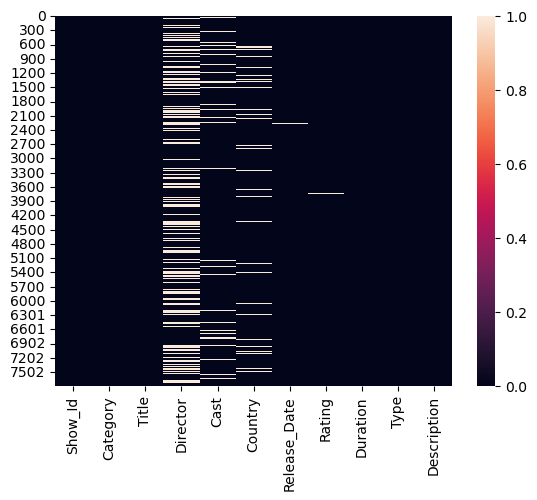

In [21]:
sns.heatmap(df.isnull())

# Q.3) For 'House of Cards', what is the Show Id and Who is the Director of this show ?

In [22]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [23]:
df["Title"]

0                                            3%
1                                         07:19
2                                         23:59
3                                             9
4                                            21
                         ...                   
7784                                       Zozo
7785                                     Zubaan
7786                          Zulu Man in Japan
7787                      Zumbo's Just Desserts
7788    ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
Name: Title, Length: 7787, dtype: object

In [24]:
df[df["Title"].isin(["House of Cards"])]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


# Q. 4) In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.

In [25]:
df.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [26]:
F = df.groupby("Category").get_group("TV Show")
F

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
...,...,...,...,...,...,...,...,...,...,...,...
7769,s7768,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
7777,s7776,TV Show,Zoids Wild,NaN,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,"August 14, 2020",TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...
7779,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7781,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...


In [27]:
E = df.groupby("Category").get_group("Movie")
E

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
...,...,...,...,...,...,...,...,...,...,...,...
7783,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."


In [28]:
df["Date_N"] = pd.to_datetime(df["Release_Date"], errors='coerce')
df

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020-10-19
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019-03-02
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020-09-25
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020-10-31


In [29]:
df.dtypes

Show_Id                 object
Category                object
Title                   object
Director                object
Cast                    object
Country                 object
Release_Date            object
Rating                  object
Duration                object
Type                    object
Description             object
Date_N          datetime64[ns]
dtype: object

In [30]:
A = df["Date_N"].dt.year.value_counts()
A

Date_N
2019.0    2136
2020.0    2008
2018.0    1661
2017.0    1201
2016.0     432
2021.0     117
2015.0      79
2014.0      24
2011.0      13
2013.0      10
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: count, dtype: int64

<Axes: xlabel='Date_N'>

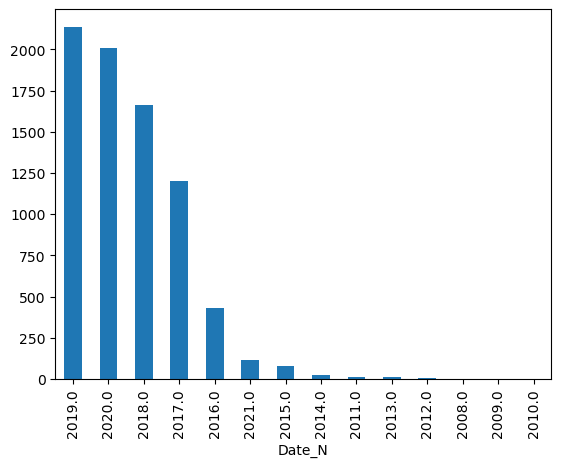

In [31]:
df["Date_N"].dt.year.value_counts().plot(kind="bar")

In [32]:
sns.

SyntaxError: invalid syntax (1118962691.py, line 1)

In [ ]:
plt.figure(figsize=(10, 6)) 
sns.barplot(x=A,y ="Category" ,data = df)
plt.show()

In [33]:
A

Date_N
2019.0    2136
2020.0    2008
2018.0    1661
2017.0    1201
2016.0     432
2021.0     117
2015.0      79
2014.0      24
2011.0      13
2013.0      10
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: count, dtype: int64

# Q. 5) Show only the Titles of all TV Shows that were released in India only.

In [41]:
df[(df["Category"]=="TV Show")&(df["Country"]=="India")].Title

86            21 Sarfarosh: Saragarhi 1897
132                              7 (Seven)
340                           Agent Raghav
364                           Akbar Birbal
533                    Anjaan: Rural Myths
                       ...                
6249                  The Creative Indians
6400    The Golden Years with Javed Akhtar
6469                The House That Made Me
7294                            Typewriter
7705                       Yeh Meri Family
Name: Title, Length: 71, dtype: object

# Q. 6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?

In [58]:
df["Director"].value_counts().head(10)

Director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: count, dtype: int64

In [50]:
df.count()

Show_Id         7787
Category        7787
Title           7787
Director        5399
Cast            7069
Country         7280
Release_Date    7777
Rating          7780
Duration        7787
Type            7787
Description     7787
Date_N          7689
dtype: int64

In [53]:
df.groupby("Category").get_group("Director")

KeyError: 'Director'

# Q. 7) Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".

In [59]:
df.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23


In [73]:
df[(df["Category"]=="Movie")&(df["Type"]=="Comedies")] 

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,"January 1, 2021",PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021-01-01
84,s85,Movie,21 & Over,"Jon Lucas, Scott Moore","Miles Teller, Skylar Astin, Justin Chon, Sarah...",United States,"April 16, 2019",R,93 min,Comedies,Jeff's straight-and-narrow life changes abrupt...,2019-04-16
148,s149,Movie,A Bad Moms Christmas,"Jon Lucas, Scott Moore","Mila Kunis, Kristen Bell, Kathryn Hahn, Susan ...","United States, China","February 14, 2020",R,104 min,Comedies,"Stressed-out moms Amy, Carla and Kiki are back...",2020-02-14
174,s175,Movie,A Futile and Stupid Gesture,David Wain,"Will Forte, Domhnall Gleeson, Martin Mull, Joe...",United States,"January 26, 2018",TV-MA,102 min,Comedies,"In a brief life full of triumph and failure, ""...",2018-01-26
...,...,...,...,...,...,...,...,...,...,...,...,...
7341,s7340,Movie,Undercover Brother 2,Leslie Small,"Michael Jai White, Vince Swann, Barry Bostwick...",United States,"November 5, 2019",R,85 min,Comedies,When a beloved secret agent falls deep into a ...,2019-11-05
7590,s7589,Movie,Where's the Money,Scott Zabielski,"Andrew Bachelor, Kat Graham, Mike Epps, Terry ...",United States,"January 22, 2018",R,86 min,Comedies,"Hunting for a stash of stolen money, a sharp-w...",2018-01-22
7623,s7622,Movie,Wild Oats,Andy Tennant,"Shirley MacLaine, Jessica Lange, Billy Connoll...","Germany, United States","May 13, 2017",PG-13,86 min,Comedies,"When insurance accidentally pays her millions,...",2017-05-13
7634,s7633,Movie,Wine Country,Amy Poehler,"Amy Poehler, Maya Rudolph, Ana Gasteyer, Rache...",United States,"May 10, 2019",R,104 min,Comedies,When longtime friends meet up for a wine-soake...,2019-05-10


In [72]:
df[df["Country"]=="United Kingdom"]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018-05-16
58,s59,TV Show,100% Hotter,NaN,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,"November 1, 2019",TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist...",2019-11-01
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,"December 20, 2018",TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...,2018-12-20
85,s86,TV Show,21 Again,NaN,Laura Morgan,United Kingdom,"July 1, 2020",TV-MA,1 Season,"British TV Shows, Reality TV","In a social experiment, a group of daughters s...",2020-07-01
93,s94,Movie,27: Gone Too Soon,Simon Napier-Bell,"Janis Joplin, Jimi Hendrix, Amy Winehouse, Jim...",United Kingdom,"May 1, 2018",TV-MA,70 min,Documentaries,Explore the circumstances surrounding the trag...,2018-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...
7670,s7669,TV Show,World War II in Colour,NaN,Robert Powell,United Kingdom,"August 1, 2017",TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...,2017-08-01
7671,s7670,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,"February 1, 2019",TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali...",2019-02-01
7688,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,"March 18, 2020",TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc...",2020-03-18
7725,s7724,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,"December 31, 2017",TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...,2017-12-31


In [78]:
df[(df["Category"]=="Movie" ) & (df["Type"]=="Comedies") | (df["Country"]=="United Kingdom")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date_N
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018-05-16
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08
58,s59,TV Show,100% Hotter,NaN,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,"November 1, 2019",TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist...",2019-11-01
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,"January 1, 2021",PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021-01-01
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,"December 20, 2018",TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...,2018-12-20
...,...,...,...,...,...,...,...,...,...,...,...,...
7670,s7669,TV Show,World War II in Colour,NaN,Robert Powell,United Kingdom,"August 1, 2017",TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...,2017-08-01
7671,s7670,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,"February 1, 2019",TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali...",2019-02-01
7688,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,"March 18, 2020",TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc...",2020-03-18
7725,s7724,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,"December 31, 2017",TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...,2017-12-31
